### Part I: Hybrid Images

In [ ]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



In [59]:
import cv2
import scipy
import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "C:\\Users\\rishi\\OneDrive\\College\\CS445\\hybrid\\" 

utilfn = datadir + "utils.py"
import utils

In [15]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook 
import matplotlib.pyplot as plt

In [16]:
im1_file = "C:\\Users\\rishi\\Downloads\\tiara.jpeg"
im2_file = "C:\\Users\\rishi\\Downloads\\rishit.jpeg"

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


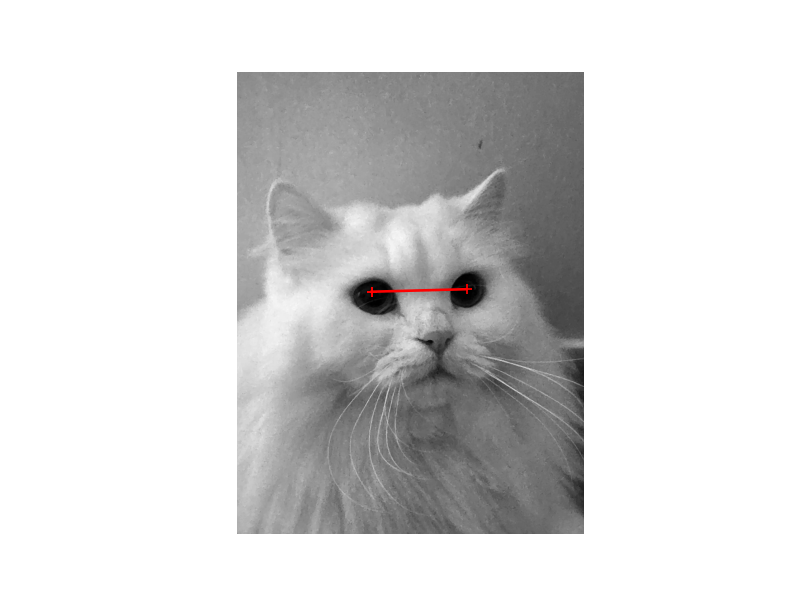

In [17]:
pts_im1 = utils.prompt_eye_selection(im1)
#pts_im1 = np.array([[900, 500], [748, 370]]) # uncomment if entering [x, y] pts manually
#plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>


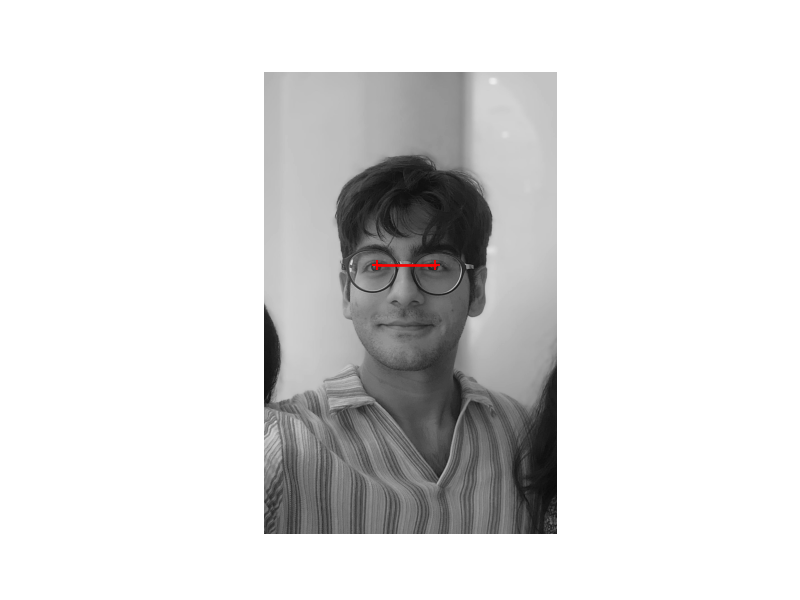

In [18]:
pts_im2 = utils.prompt_eye_selection(im2)
#pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
#plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [19]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [20]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


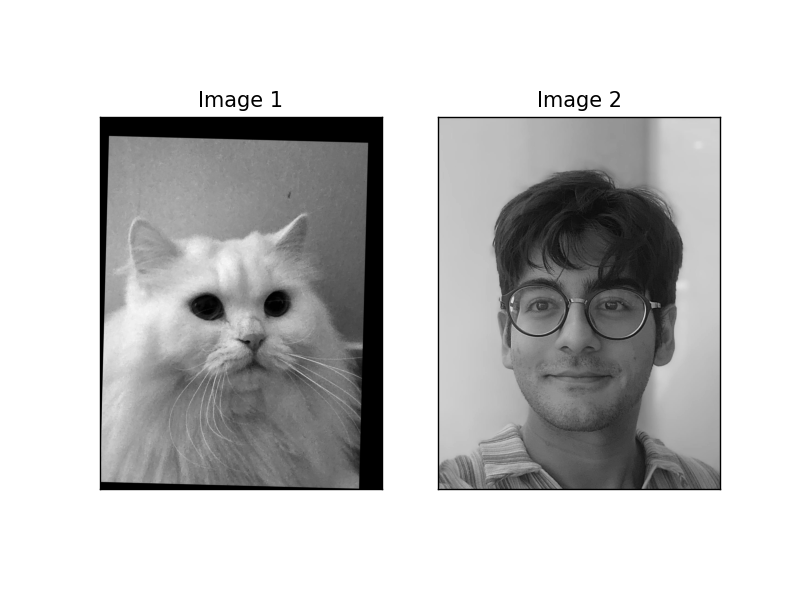

In [21]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [50]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  
    kernel_low = utils.gaussian_kernel(sigma_low, 3*sigma_low)
    low_pass = cv2.filter2D(im1, -1, kernel_low)
    
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
    axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(im1,cmap='gray')
    axes[1].set_title('original low pass image'), axes[1].set_xticks([]), axes[1].set_yticks([])
    
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass)))))
    axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(low_pass,cmap='gray')
    axes[1].set_title('low pass image'), axes[1].set_xticks([]), axes[1].set_yticks([])

    kernel_high = utils.gaussian_kernel(sigma_high, 3*sigma_high)
    high_pass = im2 - cv2.filter2D(im2, -1, kernel_high)

    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
    axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(im2,cmap='gray')
    axes[1].set_title('original high pass image'), axes[1].set_xticks([]), axes[1].set_yticks([])
    
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass)))))
    axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(high_pass,cmap='gray')
    axes[1].set_title('high pass image'), axes[1].set_xticks([]), axes[1].set_yticks([])

    hybrid_im = low_pass + high_pass
    
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid_im)))))
    axes[0].set_title('FFT'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(hybrid_im,cmap='gray')
    axes[1].set_title('hybrid image'), axes[1].set_xticks([]), axes[1].set_yticks([])
    
    return hybrid_im



The approach here is to use Gaussian filters with different standard deviations to emphasize different frequency components in the input images. Low-pass filtering (sigma_low) retains the low-frequency components, while high-pass filtering (sigma_high) retains the high-frequency components. Combining these filtered versions creates a hybrid image that appears as one image at a distance and another image up close due to differences in perceived spatial frequencies. The Fourier transforms are displayed to help visualize the frequency content at each stage.

<IPython.core.display.Javascript object>


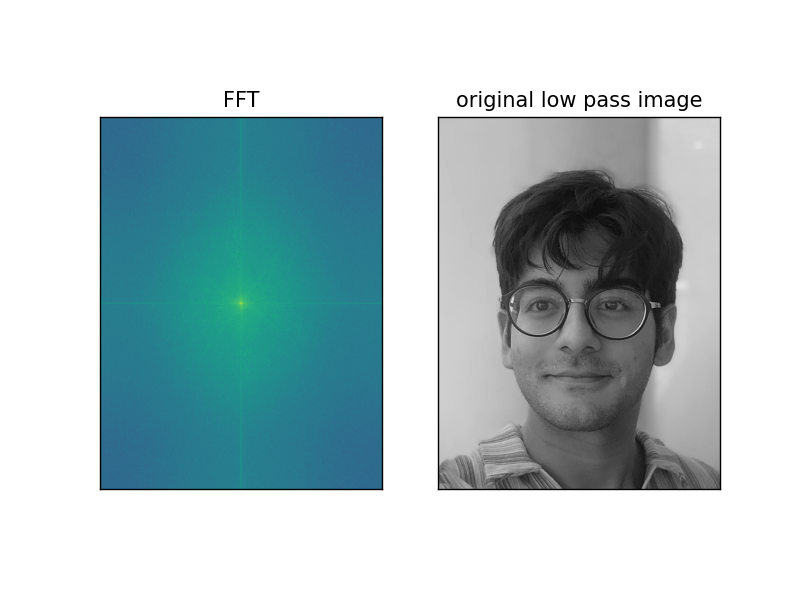

<IPython.core.display.Javascript object>


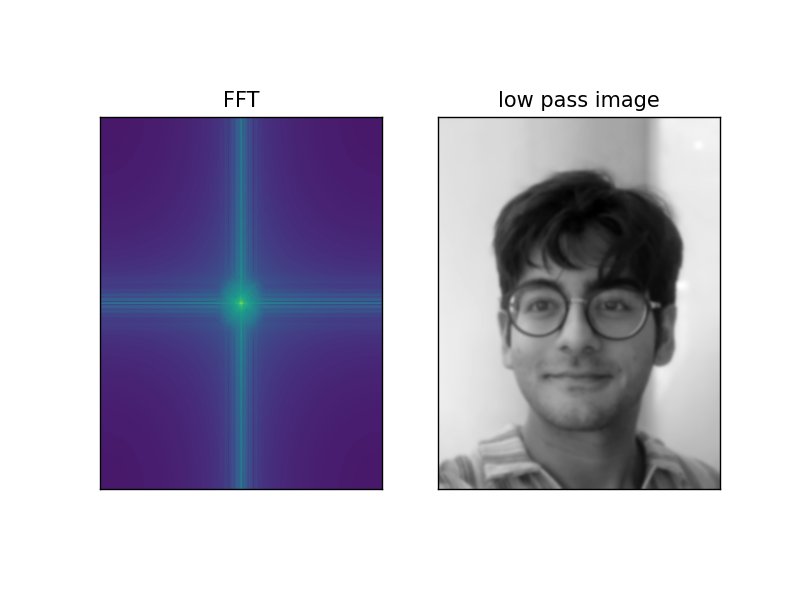

<IPython.core.display.Javascript object>


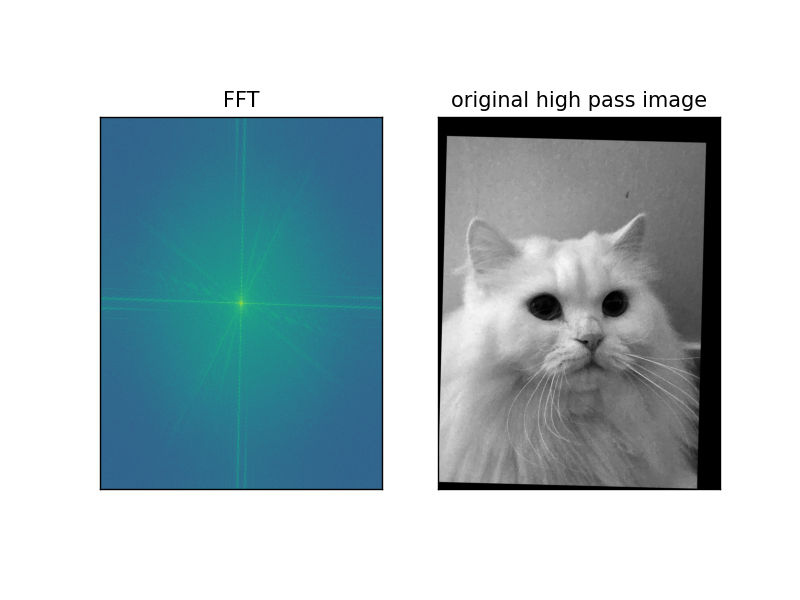

<IPython.core.display.Javascript object>


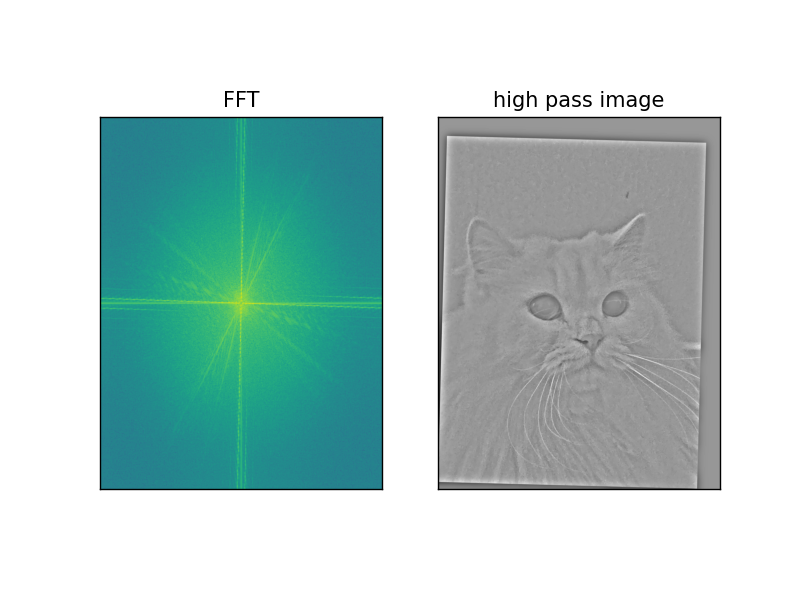

<IPython.core.display.Javascript object>


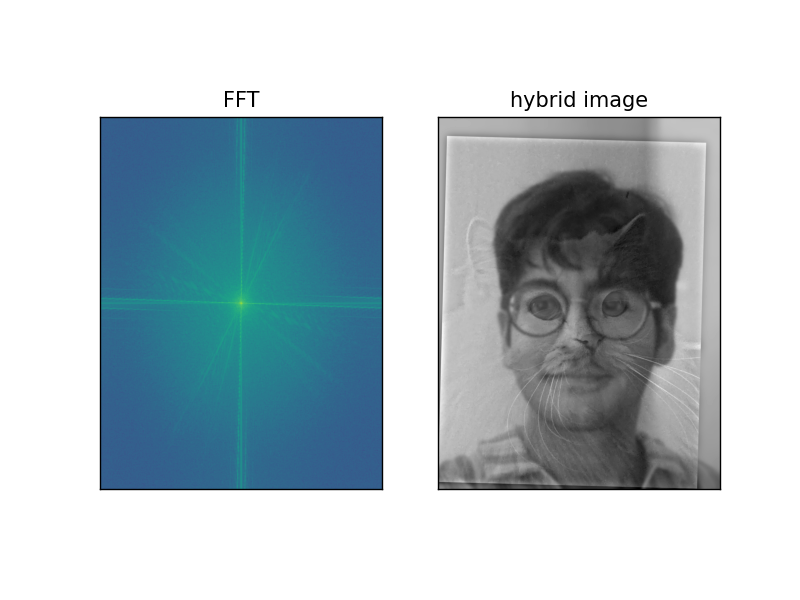

In [51]:
sigma_low = 5 # choose parameters that work for your images
sigma_high = 15

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)


<IPython.core.display.Javascript object>


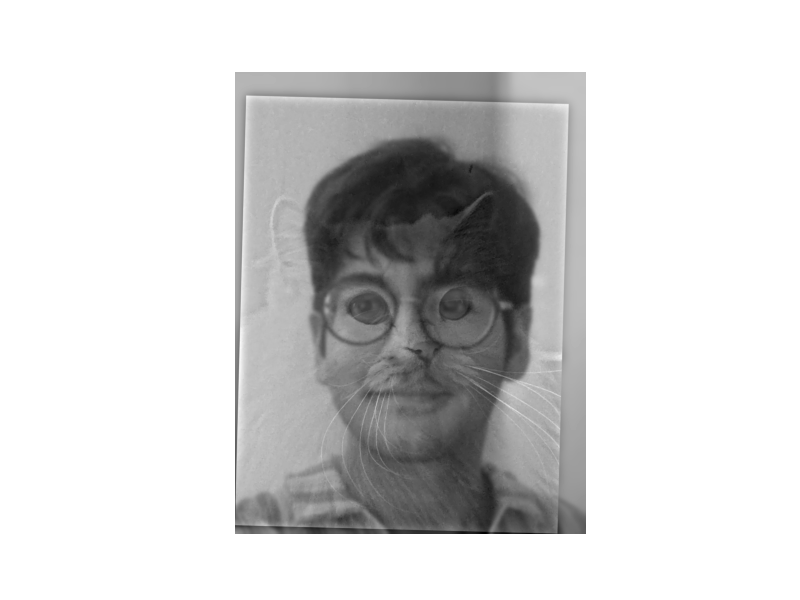

In [52]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

<IPython.core.display.Javascript object>


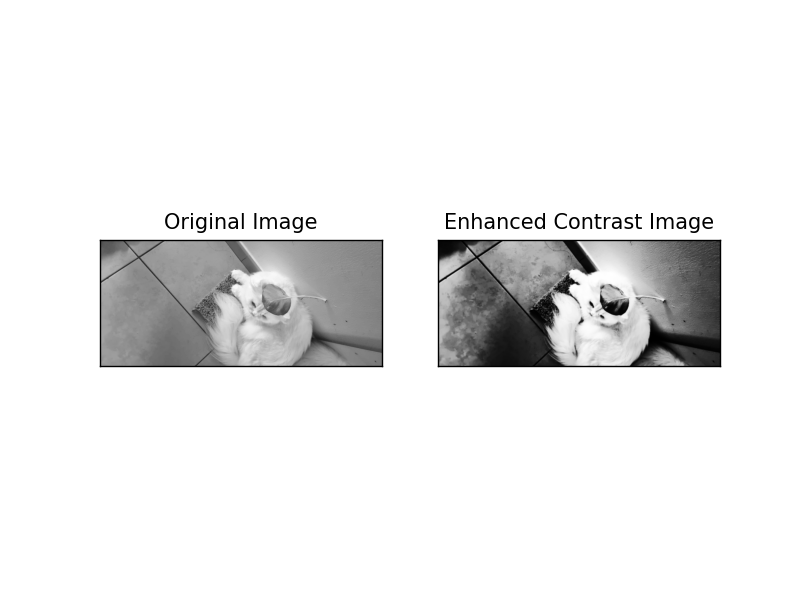

(Text(0.5, 1.0, 'Enhanced Contrast Image'), [], [])

In [62]:
im3_file = "C:\\Users\\rishi\\Downloads\\mango.jpeg"
im3 = cv2.imread(im3_file, cv2.IMREAD_GRAYSCALE)
im3_hist = cv2.equalizeHist(im3)
im3_fin = scipy.ndimage.gaussian_filter(im3_hist, sigma=1)


fig, axes = plt.subplots(1, 2)
axes[0].imshow(im3, cmap='gray')
axes[0].set_title('Original Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im3_fin, cmap='gray')
axes[1].set_title('Enhanced Contrast Image'), axes[1].set_xticks([]), axes[1].set_yticks([])




In the above image, I opted to use histogram equalization since it would make the weight of all portions of the image equal. This, in turn, would suppress the portions of the image that were of lower intensity, and accentuate the portions of the image that are of higher intensity. In essence, this makes the darker portions of the image darker, and the lighter portions of the image lighter.

#### Color enhancement 

<IPython.core.display.Javascript object>


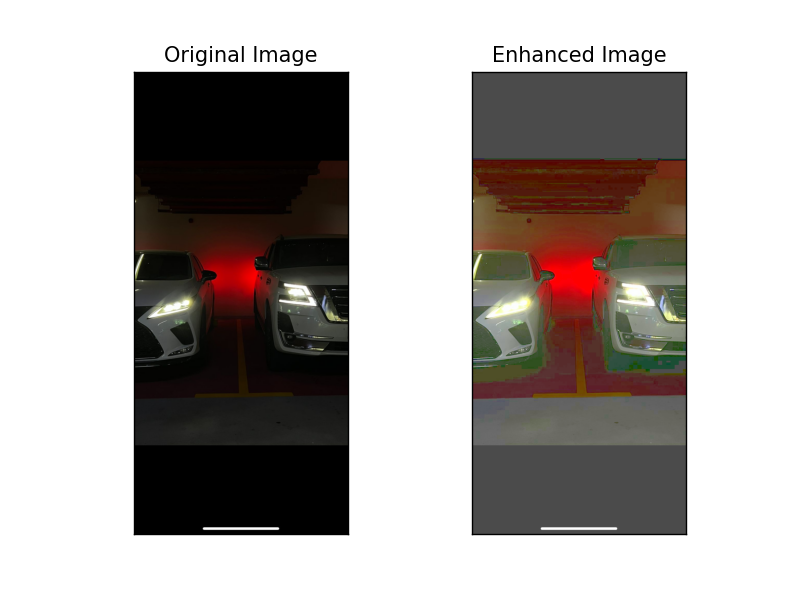

(Text(0.5, 1.0, 'Enhanced Image'), [], [])

In [67]:
im4_file = "C:\\Users\\rishi\\Downloads\\cars.jpeg"
im4 = cv2.imread(im4_file)
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(im4, cv2.COLOR_RGB2HSV)
hue, saturation, value = cv2.split(hsv)
value[value >= 180] = 255
value[value < 180] = value[value < 180] + 75
hsv_fin = cv2.merge((hue, saturation, value))
im4_fin = cv2.cvtColor(hsv_fin, cv2.COLOR_HSV2RGB)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(im4, cmap='gray')
axes[0].set_title('Original Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im4_fin, cmap='gray')
axes[1].set_title('Enhanced Image'), axes[1].set_xticks([]), axes[1].set_yticks([])


Here, the method I followed was that I split the pixels of the image into their HSV values ('hue', 'saturation','value'). For color enhancement, the hue or saturation of the image should not be affected, since I was only interested in increasing the brightness of the colors of the image, I affected only the value. I decided to increase all the values of the image by an arbitrarily decided value of 75, where I increased the value of pixels below 180 by 75, and anything above was set to the value limit of an RGB image (255). Finally, I merged the HSV values, and then converted it into an RGB image, comparing it with the original image.

#### Color shift

<IPython.core.display.Javascript object>


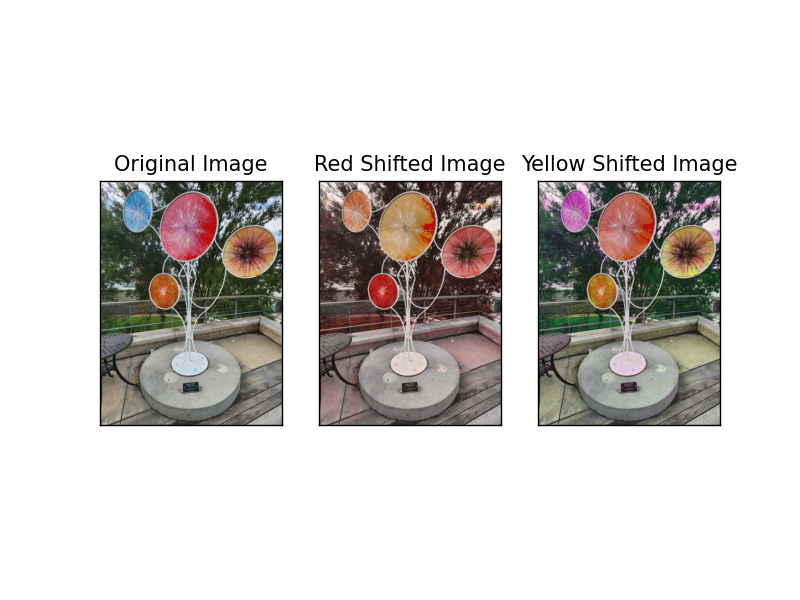

(Text(0.5, 1.0, 'Yellow Shifted Image'), [], [])

In [80]:
im5_file = "C:\\Users\\rishi\\Downloads\\sculpture.jpeg"
im5 = cv2.imread(im5_file)
im5_original = cv2.cvtColor(im5, cv2.COLOR_BGR2RGB)
im5_hsv = cv2.cvtColor(im5, cv2.COLOR_BGR2HSV)
im5_redshift = im5_hsv.copy()
im5_yellowshift = im5_hsv.copy()
im5_redshift[:,:,0] = im5_redshift[:,:,0] * 0.1
im5_yellowshift[:,:,0] = im5_yellowshift[:,:,0] * 1.5
im5_yellowshift[:,:,0][im5_yellowshift[:,:,0] > 180] = 180
im5_red = cv2.cvtColor(im5_redshift, cv2.COLOR_HSV2RGB)
im5_yellow = cv2.cvtColor(im5_yellowshift, cv2.COLOR_HSV2RGB)

fig, axes = plt.subplots(1, 3)
axes[0].imshow(im5_original, cmap='gray')
axes[0].set_title('Original Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im5_red)
axes[1].set_title('Red Shifted Image'), axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(im5_yellow)
axes[2].set_title('Yellow Shifted Image'), axes[2].set_xticks([]), axes[2].set_yticks([])



In this color shift interpretation, I essentially used the values of the hue (in the HSV converted values) and shifted two seperate copies in seperate ways to create a color shifted version of the original image. For the red shifted values, I reduced the values by multiplying them with 0.1. For the yellow shifted values I increased them, multiplying them by 1.5, and limiting the values above 180 to 180, which is the highest possible value of hue since it typically measures angles in degrees.